# El Perceptrón

¿Qué es el perceptrón?

El perceptrón es un algoritmo creado por [Rosenblatt, F. (1958)](https://psycnet.apa.org/journals/rev/65/6/386/), el autor de este algoritmo se basa en las ideas de Santiago Ramon y Cajal.

Estos últimos autores fueron pioneros en el estudio del funcionamiento del cerebro humano, ya que en su tiempo demostraron, que el cerebro está compuesto de una misma neurona básica, dando un importante avance en el entendimiento de la complejidad del cerebro. Con sus estudios evidenciaron que la complejidad del cerebro resulta no de la complejidad de las células nerviosas, sino de la conectividad que tienen dichas células. Dando lugar a la revolución de la "Doctrina de la Neurona".

Desde una perspectiva matemática, Rosenblatt se basa en la elaboración del primer modelo matemático de una neurona, desarrollada por [McCulloch, W. S., & Pitts, W. (1943)](https://link.springer.com/article/10.1007/BF02478259).

![Imagen](https://miro.medium.com/v2/format:webp/1*WRG_Re8vGVuHDYigtq2IBA.jpeg)

Donde $x_i \in \mathbb{R}$ y representa las entradas a la neurona artificial; $ω_i$ y $b$ son los pesos sinápticos y el sesgo, respectivamente, que se ajustaran con el algoritmo de aprendizaje y; $\varphi$ es una función de activación que en este caso se lo llamará función de umbral y nos determinará si pasa un valor.

De manera general se puede decir que la **neurona artificial** toma $m$ características $x_1, x_2, ..., x_m$ asociados con un **peso sináptico** $ω_1, ω_2, ..., ω_m$, siendo estos números reales que representan la importancia de cada entrada para el valor de salida de la neurona. Por lo tanto, la neurona será la suma ponderada de estos dos elementos:

$$\sum_i x_i ω_i,$$

$∀ j \in \left\{ 1, 2, ..., m \right\}$. A esta toma de decisión se le puede agregar un sesgo de la propia neurona, tal que se pueda representar de la siguiente manera:

$$\sum_i x_i ω_i + b$$

A esta nueva decisión podemos pasarla por una función de activación, de modo que:

$$ φ(\textbf{x}) = \begin{cases}
        0, & \text{si } \sum_{j} w_ix_i + b < 0 \\
1, & \text{si } \sum_{j} w_ix_i + b \geq 0
\end{cases}$$

donde $\textbf{x}=x_1, x_2, ..., x_m$ y $j \in \left\{ 1, 2, ..., m \right\}$.


De esta forma se permite que la neurona dispare o no una señal dentro del conjunto 0 o 1.

Es de esta manera que llegamos a describir al **perceptrón** como un algoritmo creado por Rosenblatt, donde entrenar redes neuronales significa cambiar los pesos sinápticos y el sesgo con el objetivo de predecir los valores de salida.

Dado un conjunto de datos $D= \left\{ (x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), ..., (x^{(p)}, y^{(p)}) \right\}$, donde $x^{(i)} \in \mathbb{R}^n$, $y^{(i)} \in \left\{ 0, 1 \right\}$

$x^{(i)}$ representa un vector de caracteristicas para un único individuo y $y^{(i)}$ representa una salida para dicho individuo.

A partir del perceptrón se tendrá un ciclo por épocas, siempre y cuando las variables sean separables este algoritmo converjera.

# Programando el perceptrón

Para programar tal perceptrón debemos seguir la siguiente regla:

\begin{align}
\hat{y} = \varphi (w^T x^{(i)} + b) \\
w + η (y^{(i)} - \hat{y}) x^{(i)} \rightarrow w \\
b + η (y^{(i)} - \hat{y}) \rightarrow b \\
\end{align}

Donde $η$ es un hiperparámetro ajustado por el investigador y pondera cuanto aprenderá de cada ejemplo el algoritmo, a este hiperparámetro se lo conoce como factor de aprendizaje; w es un vector de pesos sinápticos de $n x 1$.

De esta forma podemos ir actualizando los pesos sinápticos y el sesgo a medida que el algoritmo no prediga correctamente los valores de salida.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Creamos una matriz de características de 2x4
X = np.array([[0,0,1,1],
              [0,1,0,1]])

In [ ]:
X.shape[1] #4columnas

4

In [ ]:
X[:,0] #primera columna

array([0, 0])

In [ ]:
#Creamos una matriz con los valores deseados que queremos aprender
Y = np.array([0,0,1,0])

In [ ]:
class Perceptron:

  def __init__(self, n_entrada, factor_aprenddizaje):
    self.w = -1 +2 * np.random.rand(n_entrada) # se creara un vector aleatorio entre -1 y 1
    self.b = -1 +2 * np.random.rand()
    self.eta = factor_aprenddizaje

  def predict(self, X): #creamos la funcion para predecir
    p = X.shape[1] #Sacamos la segunda coordenada para tener el número de patrones p
    y_est = np.zeros(p)
    for i in range(p):
      y_est[i] = np.dot(self.w,X[:,i]) + self.b #w'x + b
      if y_est[i] >= 0: #creamos la funcion de activacion
        y_est[i] = 1
      else:
        y_est[i] = 0
    return y_est

  def fit(self, X, Y, epocas=100):  #funcion para entrenar (aprender)
    p = X.shape[1]
    for _ in range(epocas): #_ para que no nos importe la variable
      for i in range(p):
        y_est = self.predict(X[:,i].reshape(-1,1)) #reshape para que tengamos una matriz bidimensional
        #Solo falta las actualizaciones
        self.w += self.eta * (Y[i] - y_est) * X[:,i]
        self.b += self.eta * (Y[i] - y_est)

neurona = Perceptron(2, 0.1) #instanciamos la clase

In [ ]:
print(neurona.w)
print(neurona.b)
print(neurona.eta)

[-0.33628585 -0.68648387]
0.20385372691004444
0.1


In [ ]:
#Predecimos con la vector de caracteristicas, para ello usamos el método predict creado en la clase Perceptron
neurona.predict(X)
#No predijo correctamente el primer elemento de la vaiable Y

array([1., 0., 0., 0.])

In [ ]:
#Entrenamos el modelo para ajustar las predicciones, para ello usamos el método fit creado en la clase Perceptron
neurona.fit(X,Y)

In [ ]:
#para ver si ya aprendió, volvemos a hacer una nueva prediccion
neurona.predict(X)
# Y en efecto la neurona aprendió, ya que podemos observar que predijo correctamente los 4 alementos de la variable Y

array([0., 0., 1., 0.])

# Gráfica

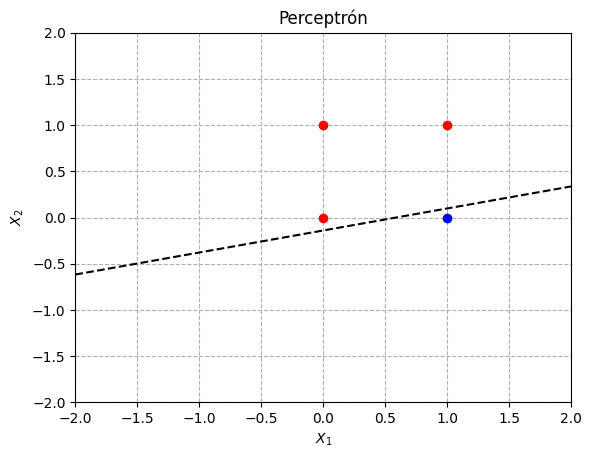

In [ ]:
#podemos crear una funcion para graficar la neurona (linealmente separable)
def draw_2d(model):
  w1, w2, b = model.w[0], model.w[1], model.b
  li, ls = -2, 2 #dibujamos de -2 a +2
  plt.plot([li, ls],[(1/w2)*(-w1*(li)-b),(1/w2)*(-w1*(ls)-b)], '--k')

_,p = X.shape
for i in range(p):
  if Y[i] == 0:
    plt.plot(X[0,i], X[1,i], 'or') #orojo
  else:
    plt.plot(X[0,i], X[1,i], 'ob') #oblue


plt.title("Perceptrón")
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.grid(linestyle = "dashed")

draw_2d(neurona)

Gráficamente podemos observar que nuestra neurona clasificó correctamente a los valores de Salida Y . Podemos dar diferentes valores a Y, que tomen los valores de 0 o 1, y visualizarlo para observar lo bien que clasifica la neurona. También, para hacer mucho más entretenido esto, podemos aumentar el número de filas a la matriz de caracteristicas X; sin embargo, puede que llegue un punto donde la neurona no sea capaz de clasificar correctamente debido a la linealidad de esta.